In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [47]:
data = '''
# nelec  rs    nkpts        HF           CCD_corr             AFQMC/HF                AFQMC/CID             AFQMC/CCD_PT
#    14  5.0     19      -0.8125485     -0.13690349      -0.947382 +/- 0.000850  -0.953628 +/- 0.000488  -0.953763 +/- 0.000401
    14  5.0     57      -0.8125485     -0.22336843      -1.056076 +/- 0.000894  -1.063944 +/- 0.000607  -1.063780 +/- 0.000775
    14  5.0     93      -0.8125485     -0.24493419      -1.079162 +/- 0.000646  -1.090699 +/- 0.000867  -1.092355 +/- 0.000991
    14  5.0     171     -0.8125485     -0.25104848      -1.082545 +/- 0.000830  -1.096373 +/- 0.000599  -1.098375 +/- 0.000869
#    14  5.0     389     -0.8125485     -0.25273434
'''

In [63]:
m = np.array([])
hf = np.array([])
ccsd_corr = np.array([])
afqmc_hf = np.array([])
afqmc_ci = np.array([])
afqmc_pt = np.array([])
afqmc_hf_err = np.array([])
afqmc_ci_err = np.array([])
afqmc_pt_err = np.array([])
for lines in data.splitlines():
    if not lines.startswith('#') and len(lines) > 0:
        parts = lines.split()
        m = np.hstack((m,int(parts[2])))
        hf = np.hstack((hf,float(parts[3])))
        ccsd_corr = np.hstack((ccsd_corr,float(parts[4])))
        afqmc_hf = np.hstack((afqmc_hf,float(parts[5])))
        afqmc_hf_err = np.hstack((afqmc_hf_err,float(parts[7])))
        afqmc_ci = np.hstack((afqmc_ci,float(parts[8])))
        afqmc_ci_err = np.hstack((afqmc_ci_err,float(parts[10])))
        afqmc_pt = np.hstack((afqmc_pt,float(parts[11])))
        afqmc_pt_err = np.hstack((afqmc_pt_err,float(parts[13])))

In [49]:
afqmc_hf_corr = afqmc_hf - hf
afqmc_ci_corr = afqmc_ci - hf
afqmc_pt_corr = afqmc_pt - hf

In [50]:
print(afqmc_hf_corr)
print(afqmc_ci_corr)
print(afqmc_pt_corr)

[-0.2435275 -0.2666135 -0.2699965]
[-0.2513955 -0.2781505 -0.2838245]
[-0.2512315 -0.2798065 -0.2858265]


In [67]:
afqmc_hf_corr[-2:]

array([-0.2666135, -0.2699965])

In [69]:
# CCD
inv_m = 1/m
A = np.column_stack([inv_m**2, np.ones_like(inv_m)])
(a, b), residuals, rank, s = np.linalg.lstsq(A, ccsd_corr, rcond=None)

N = len(inv_m)
sigma2 = residuals[0] / (N - 2)      # variance of residuals
cov = sigma2 * np.linalg.inv(A.T @ A)

da, db = np.sqrt(np.diag(cov))
# print(f'CCD extralopation a = {a:.8f} +/- {da:.8f}')
print(f'CCD extralopation = {b:.8f} +/- {db:.8f}')
# print(f'extralopation c = {c:.8f} +/- {dc:.8f}')

# AFQMC/HF
inv_m = 1/m
A = np.column_stack([inv_m**2, np.ones_like(inv_m)])
(c, d), residuals, rank, s = np.linalg.lstsq(A, afqmc_hf_corr, rcond=None)

N = len(inv_m)
sigma2 = residuals[0] / (N - 2)      # variance of residuals
cov = sigma2 * np.linalg.inv(A.T @ A)

dc, dd = np.sqrt(np.diag(cov))
# print(f'AFQMC/HF extralopation a = {c:.8f} +/- {dc:.8f}')
print(f'AFQMC/HF extralopation = {d:.8f} +/- {dd:.8f}')

# AFQMC/CID
inv_m = 1/m
A = np.column_stack([inv_m**2, np.ones_like(inv_m)])
(e, f), residuals, rank, s = np.linalg.lstsq(A, afqmc_ci_corr, rcond=None)

N = len(inv_m)
sigma2 = residuals[0] / (N - 2)      # variance of residuals
cov = sigma2 * np.linalg.inv(A.T @ A)

de, df = np.sqrt(np.diag(cov))
# print(f'AFQMC/CID extralopation a = {e:.8f} +/- {de:.8f}')
print(f'AFQMC/CID extralopation = {f:.8f} +/- {df:.8f}')

# AFQMC/CCD_PT
inv_m = 1/m
A = np.column_stack([inv_m**2, np.ones_like(inv_m)])
(g, h), residuals, rank, s = np.linalg.lstsq(A, afqmc_pt_corr, rcond=None)

N = len(inv_m)
sigma2 = residuals[0] / (N - 2)      # variance of residuals
cov = sigma2 * np.linalg.inv(A.T @ A)

dg, dh = np.sqrt(np.diag(cov))
# print(f'CCD extralopation a = {g:.8f} +/- {dg:.8f}')
print(f'AFQMC/CCD_PT extralopation = {h:.8f} +/- {dh:.8f}')

CCD extralopation = -0.25551925 +/- 0.00162187
AFQMC/HF extralopation = -0.27544442 +/- 0.00343269
AFQMC/CID extralopation = -0.28977121 +/- 0.00303761
AFQMC/CCD_PT extralopation = -0.29218610 +/- 0.00326569


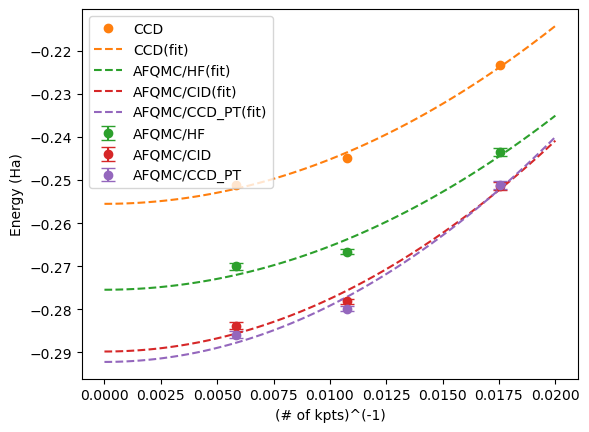

In [65]:
x = np.linspace(0,0.02,100)
y1 = a*x**2 + b
y2 = c*x**2 + d
y3 = e*x**2 + f
y4 = g*x**2 + h

plt.plot(inv_m,ccsd_corr,'o',color='C1',label='CCD')
plt.errorbar(inv_m,afqmc_hf_corr,yerr=afqmc_hf_err,fmt='o',capsize=5,color='C2',label='AFQMC/HF')
plt.errorbar(inv_m,afqmc_ci_corr,yerr=afqmc_hf_err,fmt='o',capsize=5,color='C3',label='AFQMC/CID')
plt.errorbar(inv_m,afqmc_pt_corr,yerr=afqmc_hf_err,fmt='o',capsize=5,color='C4',label='AFQMC/CCD_PT')
plt.plot(x,y1,'--',color='C1',label='CCD(fit)')
plt.plot(x,y2,'--',color='C2',label='AFQMC/HF(fit)')
plt.plot(x,y3,'--',color='C3',label='AFQMC/CID(fit)')
plt.plot(x,y4,'--',color='C4',label='AFQMC/CCD_PT(fit)')
plt.xlabel('(# of kpts)^(-1)')
plt.ylabel('Energy (Ha)')
plt.legend()
plt.show()

In [74]:
#Linear

#CCD
inv_m = 1/m[-2:]
A = np.column_stack([inv_m, np.ones_like(inv_m)])
(a, b), residuals, rank, s = np.linalg.lstsq(A, ccsd_corr[-2:], rcond=None)
print(f'CCD extralopation = {b:.8f}')

# AFQMC/HF
inv_m = 1/m[-2:]
A = np.column_stack([inv_m, np.ones_like(inv_m)])
(c, d), residuals, rank, s = np.linalg.lstsq(A, afqmc_hf_corr[-2:], rcond=None)
print(f'AFQMC/HF extralopation = {d:.8f}')

# AFQMC/CID
inv_m = 1/m[-2:]
A = np.column_stack([inv_m, np.ones_like(inv_m)])
(e, f), residuals, rank, s = np.linalg.lstsq(A, afqmc_ci_corr[-2:], rcond=None)
print(f'AFQMC/CID extralopation = {f:.8f}')

# AFQMC/CCD_PT
inv_m = 1/m[-2:]
A = np.column_stack([inv_m, np.ones_like(inv_m)])
(g, h), residuals, rank, s = np.linalg.lstsq(A, afqmc_pt_corr[-2:], rcond=None)
print(f'AFQMC/CCD_PT extralopation = {h:.8f}')

CCD extralopation = -0.25833860
AFQMC/HF extralopation = -0.27403008
AFQMC/CID extralopation = -0.29058965
AFQMC/CCD_PT extralopation = -0.29300419


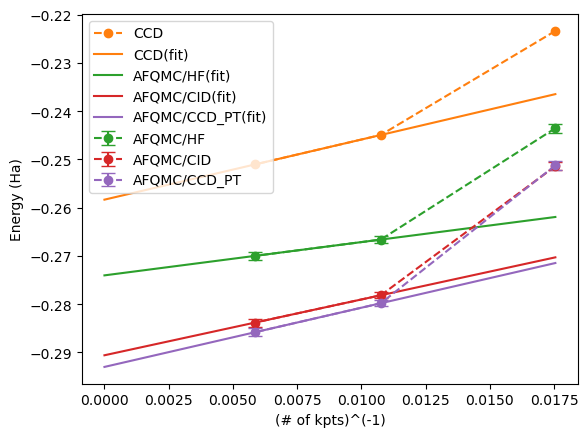

In [77]:
x = np.linspace(0,inv_m.max(),100)
y1 = a*x + b
y2 = c*x + d
y3 = e*x + f
y4 = g*x + h
inv_m = 1/m

plt.plot(inv_m,ccsd_corr,'o--',color='C1',label='CCD')
plt.errorbar(inv_m,afqmc_hf_corr,yerr=afqmc_hf_err,fmt='o--',capsize=5,color='C2',label='AFQMC/HF')
plt.errorbar(inv_m,afqmc_ci_corr,yerr=afqmc_hf_err,fmt='o--',capsize=5,color='C3',label='AFQMC/CID')
plt.errorbar(inv_m,afqmc_pt_corr,yerr=afqmc_hf_err,fmt='o--',capsize=5,color='C4',label='AFQMC/CCD_PT')
plt.plot(x,y1,'-',color='C1',label='CCD(fit)')
plt.plot(x,y2,'-',color='C2',label='AFQMC/HF(fit)')
plt.plot(x,y3,'-',color='C3',label='AFQMC/CID(fit)')
plt.plot(x,y4,'-',color='C4',label='AFQMC/CCD_PT(fit)')
plt.xlabel('(# of kpts)^(-1)')
plt.ylabel('Energy (Ha)')
plt.legend()
plt.show()